# The Solow Model

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Basic Solow Model

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

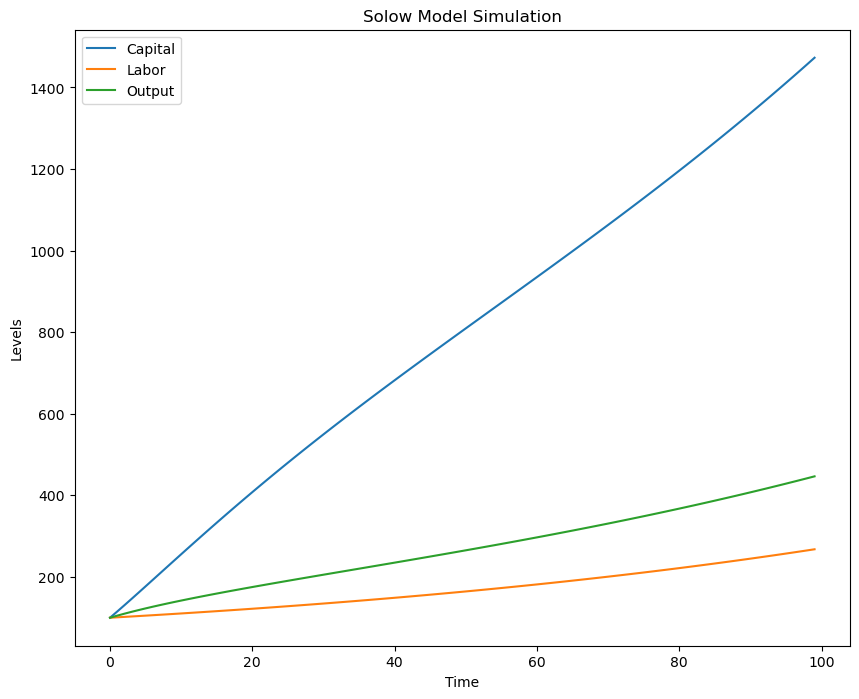

In [11]:
# Parameters
s = 0.2       # Savings rate
alpha = 0.3   # Output elasticity of capital
delta = 0.05  # Depreciation rate
n = 0.01      # Population growth rate
K0 = 100      # Initial capital stock
L0 = 100      # Initial labor
T = 100       # Number of time periods to simulate

# Initialize arrays to store the time series of capital, labor, and output
K = np.zeros(T)
L = np.zeros(T)
Y_base = np.zeros(T)
K[0] = K0
L[0] = L0

# Simulation
for t in range(T-1):
    Y_base[t] = K[t]**alpha * L[t]**(1-alpha)  # Production function
    K[t+1] = s * Y_base[t] + (1 - delta) * K[t]  # Capital accumulation
    L[t+1] = (1 + n) * L[t]  # Population growth

# Output in the last period
Y_base[T-1] = K[T-1]**alpha * L[T-1]**(1-alpha)

# Plotting the results
plt.figure(figsize=(10, 8))
plt.plot(K, label='Capital')
plt.plot(L, label='Labor')
plt.plot(Y_base, label='Output')
plt.title('Solow Model Simulation')
plt.xlabel('Time')
plt.ylabel('Levels')
plt.legend()
plt.show()


# Solow Model with technological growth

We extend the model by implementing technological growth. We set the technological growth rate to 2% and visualize how this change affects output in the model compared to the base model.

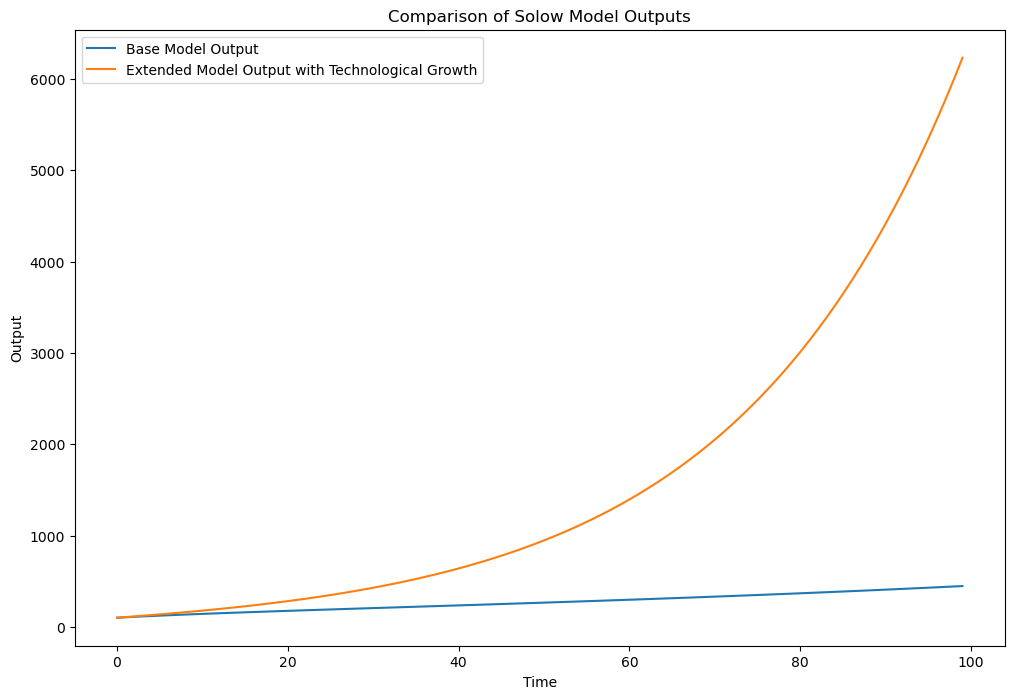

In [12]:
# Parameters for the extended model
g = 0.02       # Technological growth rate
A0 = 1         # Initial technology level

# Initialize arrays to store the time series
A = np.zeros(T)
Y_ext=np.zeros(T)
A[0] = A0

# Simulation with technology
for t in range(T-1):
    Y_ext[t] = A[t] * K[t]**alpha * L[t]**(1-alpha)  # Production function with technology
    K[t+1] = s * Y[t] + (1 - delta) * K[t]  # Capital accumulation
    L[t+1] = (1 + n) * L[t]  # Population growth
    A[t+1] = (1 + g) * A[t]  # Technological growth

# Output in the last period
Y_ext[T-1] = A[T-1] * K[T-1]**alpha * L[T-1]**(1-alpha)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(Y_base, label='Base Model Output')
plt.plot(Y_ext, label='Extended Model Output with Technological Growth')
plt.title('Comparison of Solow Model Outputs')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
plt.show()

# Conclusion

We can conclude that by extending the base model with technological growth, output is allowed to grow exponentially and is therefore far greater than the base model at time T=100.